In [42]:
# a case of drug discovery
import torch
import pandas
import numpy
import seaborn
import perming
from padelpy import padeldescriptor
from chembl_webresource_client.new_client import new_client

In [2]:
# Target search for TP53
# Tumour suppressor p53/oncoprotein Mdm2: CHEMBL1907611
target = new_client.target
target_query = target.search('TP53')
targets = pandas.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,TP53-regulating kinase,15.0,False,CHEMBL1938223,"[{'accession': 'Q96S44', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Tumor suppressor p53-binding protein 1,15.0,False,CHEMBL2424509,"[{'accession': 'Q12888', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Mus musculus,TP53-binding protein 1,15.0,False,CHEMBL4295790,"[{'accession': 'P70399', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,"Fructose-2,6-bisphosphatase TIGAR",15.0,False,CHEMBL4295958,"[{'accession': 'Q9NQ88', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'P02340', 'xref_name': None, 'xre...",Mus musculus,Cellular tumor antigen p53,14.0,False,CHEMBL4164,"[{'accession': 'P02340', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P04637', 'xref_name': None, 'xre...",Homo sapiens,Cellular tumor antigen p53,12.0,False,CHEMBL4096,"[{'accession': 'P04637', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Cellular tumor antigen p53/Death-associated pr...,10.0,False,CHEMBL3885543,"[{'accession': 'P04637', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
7,[],Homo sapiens,Tumour suppressor protein p53/Mdm4,9.0,False,CHEMBL2221344,"[{'accession': 'P04637', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,CREB-binding protein/p53,9.0,False,CHEMBL3301383,"[{'accession': 'P04637', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
9,[],Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,8.0,False,CHEMBL1907611,"[{'accession': 'P04637', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


In [3]:
# get pharmacological data of target protein
activity = new_client.activity
filter_ = activity.filter(target_chembl_id='CHEMBL1907611').filter(standard_type="IC50")
df = pandas.DataFrame.from_dict(filter_)
df.head(10)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1424130,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,27.0
1,None,None,1424131,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,66.0
2,None,None,1424132,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,90.0
3,None,None,1424135,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,85.0
4,None,None,1424136,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,92.0
5,None,None,1424137,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,70.0
6,None,None,1424233,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,15.9
7,None,None,1424234,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,92.0
8,None,None,1424235,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,14.0
9,None,None,1424236,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,26.2


In [4]:
df2 = df[df.standard_value.notna()] # IC50 value
df2 = df2[df.canonical_smiles.notna()] # molecular formula

In [5]:
# remove duplicate analysis data of the same compound based on its molecular formula
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1424130,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,27.0
1,None,None,1424131,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,66.0
2,None,None,1424132,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,90.0
3,None,None,1424135,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,85.0
4,None,None,1424136,[],CHEMBL828042,Inhibitory concentration against MDM2-p53 inte...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,"{'action_type': 'DISRUPTING AGENT', 'descripti...",None,24802446,[],CHEMBL5135142,Inhibition of HDM2-p53 (unknown origin) protei...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,uM,UO_0000065,None,0.011000000000000001
1615,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24915469,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164630,Inhibition of MDM2/p53 interaction in human U-...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,nM,UO_0000065,None,72.0
1617,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24915508,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164645,Inhibition of MDM2/p53 interaction in human U-...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,nM,UO_0000065,None,10.6
1618,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24915509,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164645,Inhibition of MDM2/p53 interaction in human U-...,B,None,None,BAO_0000190,...,Homo sapiens,Tumour suppressor p53/oncoprotein Mdm2,9606,None,None,IC50,nM,UO_0000065,None,7.85


In [6]:
# extract target dataset
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.0
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.0
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.0
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.0
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.0
...,...,...,...
1613,CHEMBL5179820,CCC[C@H]1N(C(=O)c2c(C(F)(F)F)ccnc2O)CCC[C@@]1(...,11.0
1615,CHEMBL4169540,N=C(N)Nc1cccc(C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O...,72.0
1617,CHEMBL2313487,COc1cc(Cc2c(-c3ccn(S(=O)(=O)c4ccccc4)c3)[nH]c3...,10.6
1618,CHEMBL4095983,O=C(CC(c1ccccc1)c1ccccc1)N[C@@H](Cc1ccc(OCCCNc...,7.85


In [7]:
# convert data_type to numeric
convert_dict = {'standard_value': float}
df4 = df3.astype(convert_dict)
df4.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_value        float64
dtype: object

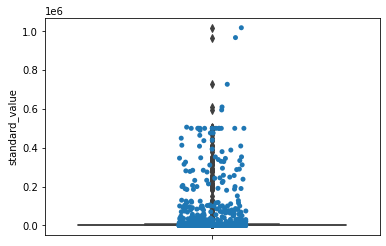

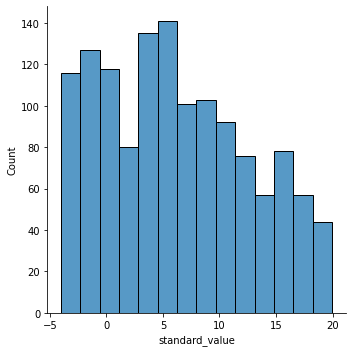

In [8]:

# standard_value: desity of drug use
ax = seaborn.boxplot(y="standard_value", data=df4)
ax = seaborn.stripplot(y="standard_value", data=df4)
# desity graph
seaborn.displot(numpy.log2(df4['standard_value']))
# The order of magnitude of the value conforms to the log10 conversion

In [9]:
df_sel = df4[['canonical_smiles', 'molecule_chembl_id']]
df_sel.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [10]:
# calculate PubChem fingerprints
padeldescriptor(mol_dir='molecule.smi',
                d_file='descriptors.csv',
                fingerprints=True,
                removesalt=True,
                standardizenitro=True)

In [43]:
padel_features = pandas.read_csv('descriptors.csv')
padel_features

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL179549,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL360920,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL182052,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL179662,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL181688,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,CHEMBL5179820,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,CHEMBL4169540,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1322,CHEMBL2313487,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1323,CHEMBL4095983,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
padel_features_X = padel_features.drop(columns=['Name'])
padel_features_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1321,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1322,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1323,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# y = df4['standard_value']
X = padel_features_X.to_numpy()
X

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [46]:
y = numpy.log10(df4['standard_value'].to_numpy()) # log10 is bidirectional mapping
y

array([4.43136376, 4.81954394, 4.95424251, ..., 2.61278386, 2.8260748 ,
       3.19865709])

In [14]:
main = perming.Box(881, 1, (2000,), batch_size=16, activation='relu', inplace_on=True, criterion='MSELoss', solver='adam', learning_rate_init=0.01)
main.print_config()

MLP(
  (mlp): Sequential(
    (Linear0): Linear(in_features=881, out_features=2000, bias=True)
    (Activation0): ReLU(inplace=True)
    (Linear1): Linear(in_features=2000, out_features=1, bias=True)
  )
)


OrderedDict([('torch -v', '1.7.1+cu101'),
             ('criterion', MSELoss()),
             ('batch_size', 16),
             ('solver',
              Adam (
              Parameter Group 0
                  amsgrad: False
                  betas: (0.9, 0.99)
                  eps: 1e-08
                  lr: 0.01
                  weight_decay: 0
              )),
             ('lr_scheduler', None),
             ('device', device(type='cuda'))])

In [18]:
main.data_loader(X, y, random_seed=0)

In [19]:
main.train_val(num_epochs=60, interval=20, backend='threading', prefer='threads', early_stop=True) # set n_jobs > 1 within number of processes

Epoch [1/60], Step [20/67], Training Loss: 0.3946, Validation Loss: 0.1380
Epoch [1/60], Step [40/67], Training Loss: 0.2052, Validation Loss: 0.1094
Epoch [1/60], Step [60/67], Training Loss: 0.4653, Validation Loss: 0.0666
Epoch [2/60], Step [20/67], Training Loss: 0.9590, Validation Loss: 0.0762
Epoch [2/60], Step [40/67], Training Loss: 0.9549, Validation Loss: 0.1152
Epoch [2/60], Step [60/67], Training Loss: 0.7753, Validation Loss: 0.1278
Epoch [3/60], Step [20/67], Training Loss: 0.4638, Validation Loss: 0.1079
Epoch [3/60], Step [40/67], Training Loss: 0.8594, Validation Loss: 0.0996
Epoch [3/60], Step [60/67], Training Loss: 0.5414, Validation Loss: 0.0568
Epoch [4/60], Step [20/67], Training Loss: 0.8926, Validation Loss: 0.1548
Epoch [4/60], Step [40/67], Training Loss: 0.4226, Validation Loss: 0.3410
Epoch [4/60], Step [60/67], Training Loss: 0.4554, Validation Loss: 0.1413
Epoch [5/60], Step [20/67], Training Loss: 0.5004, Validation Loss: 0.1259
Epoch [5/60], Step [40/67

In [20]:
main.test()

loss of Box on the 144 test dataset: 0.7201243042945862.


OrderedDict([('problem', 'regression'),
             ('loss',
              {'train': 0.17174093425273895,
               'val': 0.2166009396314621,
               'test': 0.7201243042945862})])

In [21]:
main.save(con=False, dir='./models/IC50.ckpt')

In [47]:
main.load(con=False, dir='./models/IC50.ckpt')

In [23]:
main.set_freeze({0:False}) # freeze the first layer of `self.model`
main.train_val(num_epochs=60, interval=20, backend='threading', prefer='threads', early_stop=True)
main.test()

Epoch [1/60], Step [20/67], Training Loss: 0.2660, Validation Loss: 0.1981
Epoch [1/60], Step [40/67], Training Loss: 0.2078, Validation Loss: 0.1769
Epoch [1/60], Step [60/67], Training Loss: 0.2482, Validation Loss: 0.1836
Epoch [2/60], Step [20/67], Training Loss: 0.2499, Validation Loss: 0.1578
Epoch [2/60], Step [40/67], Training Loss: 0.3302, Validation Loss: 0.1428
Epoch [2/60], Step [60/67], Training Loss: 0.2969, Validation Loss: 0.1592
Epoch [3/60], Step [20/67], Training Loss: 0.2823, Validation Loss: 0.2139
Epoch [3/60], Step [40/67], Training Loss: 0.2166, Validation Loss: 0.1631
Epoch [3/60], Step [60/67], Training Loss: 0.6140, Validation Loss: 0.1632
Epoch [4/60], Step [20/67], Training Loss: 0.3583, Validation Loss: 0.1178
Epoch [4/60], Step [40/67], Training Loss: 0.1914, Validation Loss: 0.1825
Epoch [4/60], Step [60/67], Training Loss: 0.5717, Validation Loss: 0.1216
Epoch [5/60], Step [20/67], Training Loss: 0.4316, Validation Loss: 0.1329
Epoch [5/60], Step [40/67

OrderedDict([('problem', 'regression'),
             ('loss',
              {'train': 0.12237770855426788,
               'val': 0.17376521229743958,
               'test': 0.642428994178772})])

In [ ]:
print('canonical_smiles', 'predict_value', 'standard_value')
df_sel = pandas.read_csv('molecule.smi', sep='\t', header=None)
for i in range(len(df_sel)):
    print(df_sel.iloc[i, 0], main.model(torch.as_tensor(X[i], dtype=torch.float).to(main.device)).item(), y[i])

canonical_smiles predict_value standard_value
CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)c1ccc(OCOCC[Si](C)(C)C)cc1 6.117866039276123 4.431363764158987
CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)(C)C)cc1 4.699498176574707 4.819543935541868
CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)C(=O)OC 5.706915855407715 4.954242509439325
OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1ccccc1 5.680639266967773 4.929418925714293
CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2ccccc2)cc1 5.817441940307617 4.963787827345556
COc1ccc(C(O)CNC2(c3ccccc3)c3ccccc3C(=O)N2Cc2ccccc2)cc1 5.176041603088379 4.845098040014257
O=C1c2ccccc2C(OCCCO)(c2ccc(Cl)cc2)N1Cc1ccccc1 4.9758405685424805 4.201397124320452
CC(=O)NCCN1C(=O)c2ccccc2C1(OCc1ccc(C(C)(C)C)cc1)c1ccccc1 5.49089241027832 4.146128035678238
O=C1c2ccccc2C(OCCc2ccccn2)(c2ccc(Cl)cc2)N1Cc1ccccc1 5.218924522399902 4.418301291319746
COc1cc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2ccccc2)cc(OC)c1O 4.859687805175781 4.252853030979893
O=C1c2ccccc2C(OCCCO)(c2ccccc2)N1Cc1ccc

In [ ]:
# print("canonical_smiles", df_sel[0])
print('predict_value', main.model(torch.as_tensor(X, dtype=torch.float).to(main.device)).cpu().detach().numpy(), '\nstandard_value', y)

predict_value [6.117867  4.699498  5.7069154 ... 1.3848543 2.1027884 1.8592485] 
standard_value [4.43136376 4.81954394 4.95424251 ... 2.61278386 2.8260748  3.19865709]
